# Arrays

### [Majority element](https://leetcode.com/problems/majority-element/)

[**Algo link**](https://gregable.com/2013/10/majority-vote-algorithm-find-majority.html)

In [4]:
'''
boyre moore voting algo


The essential concepts is you keep a counter for the majority number X.
If you find a number Y that is not X, the current counter should deduce 1.
The reason is that if there is 5 X and 4 Y, there would be one (5-4) more X than Y.
This could be explained as "4 X being paired out by 4 Y
'''
def func(nums):
    candidate = 0 
    count = 0 
    for i in range(len(nums)):
        if count == 0: # assign new candidate only when count is 0
            candidate = nums[i]
            count += 1
        elif candidate != nums[i]: # decrease count if new number different that the candidate is encountered . 
            count -= 1 
        else: # if same as candidate then inc its count 
            count += 1
    return candidate
print(func([2,2,1,1,1,2,2]))

2


### [Check If a Number Is Majority Element in a Sorted Array](https://leetcode.com/problems/check-if-a-number-is-majority-element-in-a-sorted-array/)

In [ ]:
class Solution:
    def isMajorityElement(self, nums: List[int], target: int) -> bool:
        def search(a, x):
            lo, hi = 0, len(a)
            while lo < hi:
                mid = (lo + hi) // 2
                if a[mid] < x:
                    lo = mid + 1
                else:
                    hi = mid
            return lo
            
        N = len(nums)
        if nums[N // 2] != target:
            return False
        lo = search(nums, target)
        print(lo)
        hi = search(nums, target + 1)
        print(hi)
        return hi - lo > N // 2
        

### [Pascals triangle](https://leetcode.com/problems/pascals-triangle)

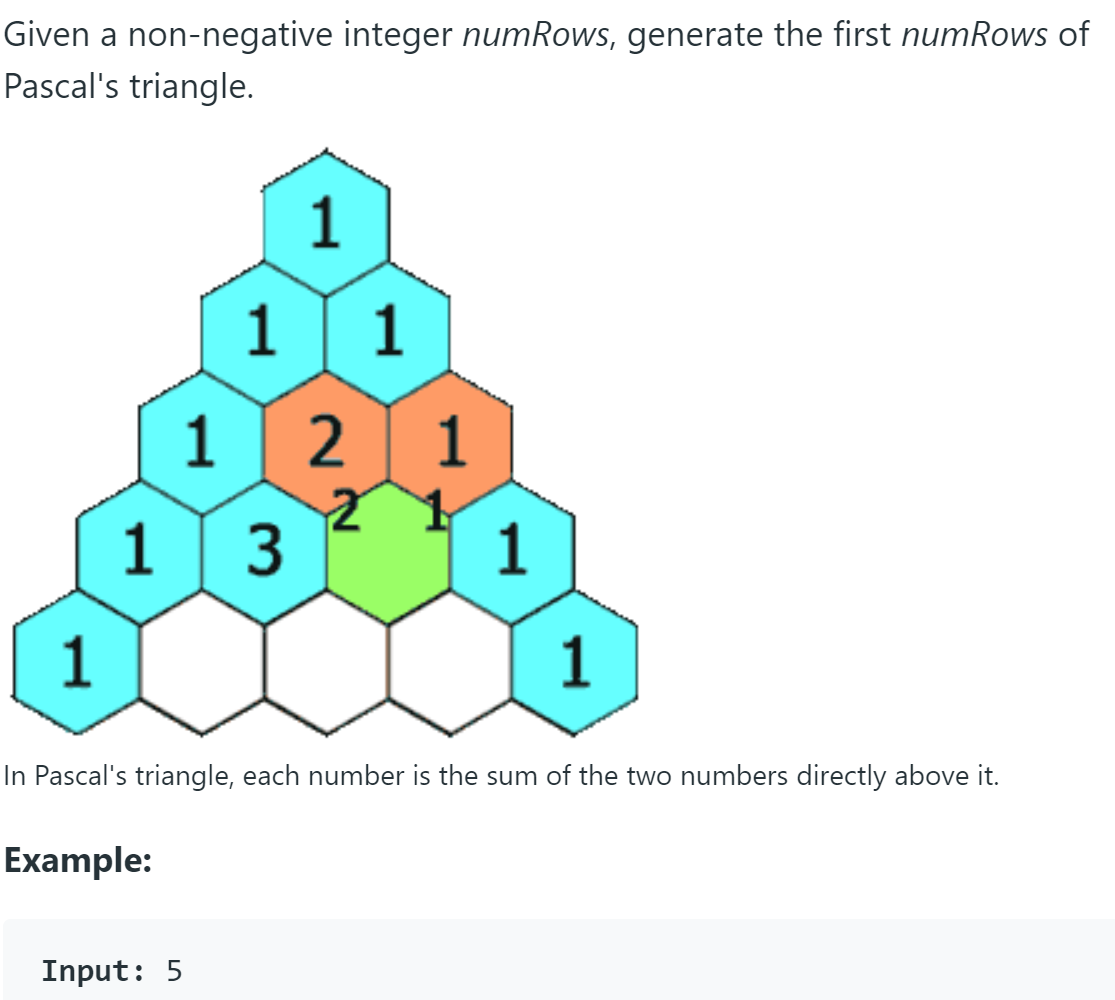

In [ ]:
class Solution:
    def generate(self, numRows: int) -> List[List[int]]:
        pascals = []

        for i in range(numRows):
            row = [None for _ in range(i + 1)] # initialize 
            row[0], row[-1] = 1, 1 # default for every level. 

            for j in range(1, len(row) - 1):
                row[j] = pascals[i - 1][j - 1] + pascals[i - 1][j]
            pascals.append(row)
        return pascals

### [reverse-integer](https://leetcode.com/problems/reverse-integer)

In [ ]:
'''

Time complexity: O(logN)
Space complexity: O(1)

'''
class Solution:
    def reverse(self, x: int) -> int:
        result = 0
        sign = False
        if x < 0:
            sign = True
            x = abs(x)
        while x!= 0:
            rem = x % 10
            result = result * 10 + rem
            x = x//10
        
        # python doesn't have a limit. So we have to manually check 
        if result > 0x7FFFFFFF:
            return 0
        
        return result * -1 if sign else result


### [Remove duplicates from an array](https://leetcode.com/problems/remove-duplicates-from-sorted-array/)

In [ ]:
class Solution:
    def removeDuplicates(self, nums: List[int]) -> int:
        # two pointer approach

        ptr = 1 # pointer and i same starting pt
        # [1,2,3,3,3,4,4] non duplicates = 4 
        # ptr takes care of the count of non dup vals in the array.
        for i in range(1, len(nums), 1):

            if nums[ptr - 1] != nums[i]: # not a duplicate
                nums[ptr] = nums[i]
                ptr += 1

        return ptr

### [Shortest Unsorted Continuous Subarray](https://leetcode.com/problems/shortest-unsorted-continuous-subarray/)

In [ ]:
import math
class Solution:
    def findUnsortedSubarray(self, nums: List[int]) -> int:
        low, high = 0, len(nums)-1
        
        # find the first number out of sorting order
        while low < len(nums) - 1 and nums[low] <= nums[low+1]:
            low += 1
        # if array is sorted    
        if low == len(nums) - 1:
            return 0
        
        # find the last number out of sorting order
        while high > 0 and nums[high] >= nums[high - 1]:
            high -= 1
            
        
        # find the max and min of subarray
        subarray_min = math.inf
        subarray_max = -math.inf
        
        for i in range(low, high+1):
            subarray_max = max(subarray_max, nums[i])
            subarray_min = min(subarray_min, nums[i])
            
        while low > 0 and nums[low-1] > subarray_min:
            low -= 1
            
        while high < len(nums)-1 and nums[high+1] < subarray_max:
            high += 1
            
        return high - low + 1
            
        
        
        

### [Intersection of Two Arrays II](https://leetcode.com/problems/intersection-of-two-arrays-ii/)

In [ ]:
class Solution:
    def intersect(self, nums1: List[int], nums2: List[int]) -> List[int]:
        
        num_count = collections.Counter(nums1)
        
        res = []
        for i in range(len(nums2)):
            if nums2[i] in num_count and num_count[nums2[i]]>0:
                res.append(nums2[i])
                num_count[nums2[i]] -= 1
        return res
        

### [Find the Duplicate Number](https://leetcode.com/problems/find-the-duplicate-number/)

In [ ]:
'''
Tortoise Hare algo 
Array is of size N and contains N + 1 elements. The extra element is the duplicate one.
1<= A[i] <= N 

Similar to Find the node at which there is cycle in LinkedList. 
'''

class Solution:
    def findDuplicate(self, nums: List[int]) -> int:
        tortoise = nums[0]
        hare = nums[0]
        
        
        while True:
            tortoise = nums[tortoise] # one jump
            hare = nums[nums[hare]] # two jumps 
            
            if tortoise == hare:
                break
                
        ptr1 = nums[0]
        ptr2 = tortoise

        while ptr1 != ptr2:
            ptr1 = nums[ptr1]
            ptr2 = nums[ptr2]

        return ptr1
        

### [Contains Duplicate](https://leetcode.com/problems/contains-duplicate/)

In [ ]:
class Solution:
    def containsDuplicate(self, nums: List[int]) -> bool:
        distinct = {}
        
        for i in range(len(nums)):
            if nums[i] not in distinct:
                distinct[nums[i]] = 1
                
            else:
                return True
        return False

### [Relative Sort Array](https://leetcode.com/problems/relative-sort-array/)

In [ ]:
class Solution:
    def relativeSortArray(self, arr1: List[int], arr2: List[int]) -> List[int]:
        # arr2.sort()
        m = {}
        for i in range(len(arr2)):
            m[arr2[i]] = 0
        arr1.sort()
        res = []
        nums_notin2 = []
        
        for i in range(len(arr1)):
            if arr1[i] in m:
                m[arr1[i]] += 1
            else:
                nums_notin2.append(arr1[i])
        for i in range(len(arr2)):
            
            freq = m[arr2[i]]
            for j in range(freq):
                res.append(arr2[i])
        
        res.extend(nums_notin2)
        return res
        

### [Plus one](https://leetcode.com/problems/plus-one/)

In [ ]:
class Solution:
    def plusOne(self, digits: List[int]) -> List[int]:
        
        for i in range(len(digits)-1, -1, -1):
            # carry in the beginning. 
            if i == 0 and digits[i] == 9:
                digits[i] = 0
                digits.insert(0,1) # add a 1 in the start. 
                break
                 
            if digits[i] != 9:
                digits[i] += 1
                break
            else:
                digits[i] = 0
                
        return digits

### [Minimum Absolute Difference](https://leetcode.com/problems/minimum-absolute-difference/)

In [ ]:
class Solution:
    def minimumAbsDifference(self, arr: List[int]) -> List[List[int]]:
        
        arr.sort() # O(NlogN) 
        minimum = float('inf')
        result = []
        # two passes
        # 1. Find min diff
        for i in range(len(arr)-1):
            if arr[i+1] - arr[i] < minimum:
                minimum = arr[i+1] - arr[i]
            
        for i in range(len(arr)-1):
            if arr[i+1]- arr[i] == minimum:
                result.append([arr[i], arr[i+1]])
        
        return result

## Two pointers

### [Merge sorted arrays](https://leetcode.com/problems/merge-sorted-array/)

In [ ]:
class Solution:
    def merge(self, nums1: List[int], m: int, nums2: List[int], n: int) -> None:
        """
        Do not return anything, modify nums1 in-place instead.
        """
        ptr1, ptr2, p = m-1,n-1, m+n-1
        while ptr1 >= 0 and ptr2 >= 0:
            if nums1[ptr1] < nums2[ptr2]:
                nums1[p] = nums2[ptr2]
                ptr2 -= 1
            else:
                nums1[p] = nums1[ptr1]
                ptr1 -= 1
                
            p -=1
            
        nums1[:ptr2 + 1] = nums2[:ptr2+1]
                
        

### [Valid palindrome](https://leetcode.com/problems/valid-palindrome/)

In [ ]:
class Solution:
    def isPalindrome(self, s: str) -> bool:
        
        ## RC ##
        
        l, r = 0, len(s)-1
        while l < r:
            while l < r and not s[l].isalnum():
                l += 1
            while l <r and not s[r].isalnum():
                r -= 1
            if s[l].lower() != s[r].lower():
                return False
            l +=1; r -= 1
        return True

### [Trapping rain water](https://leetcode.com/problems/trapping-rain-water/)

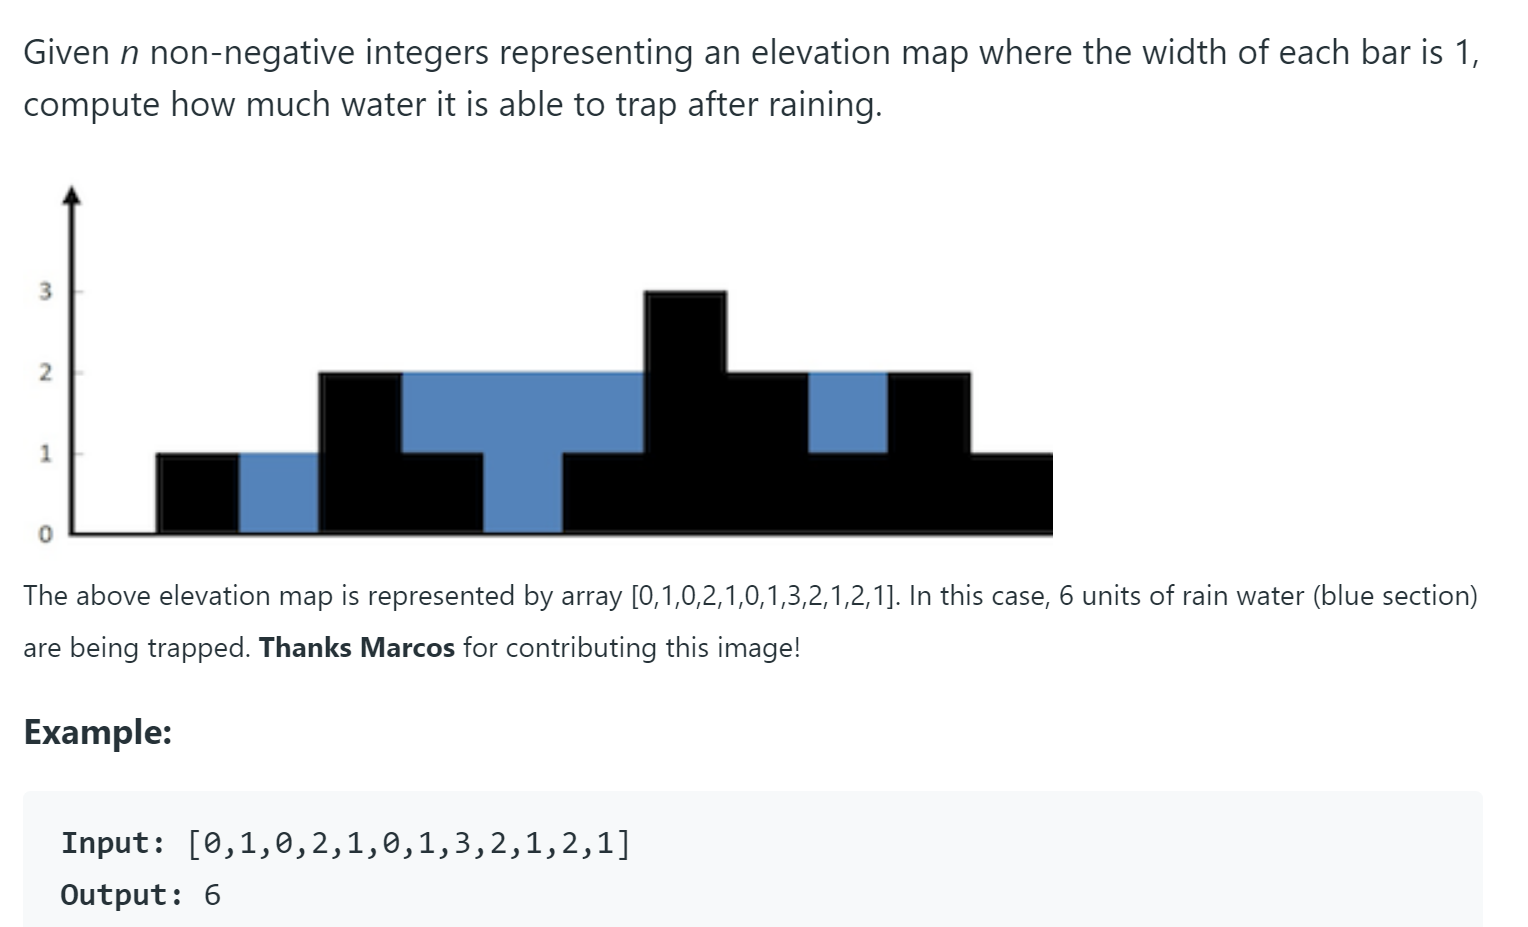

In [ ]:
'''
Idea: Water can be trapped in gaps between blocks with varying sizes. Find the left tallest block and right tallest block 
to find the water stored between the left tallest block and a block smaller than left tallest. when you encounter a block 
which is taller than previously stored left tallest then update left tallest. Likewise for right tallest block.
'''
class Solution:
    def trap(self, height: List[int]) -> int:
        # two pointers
        left, right = 0, len(height) - 1
        left_max, right_max = 0, 0
        water_count = 0

        while left < right:

            if height[left] < height[right]:

                if height[left] > left_max:
                    left_max = height[left] # left tallest building is updated 
                else:
                    water_count += left_max - height[left] # water can be stored only when the current building 
                    # is smaller than left tallest. 

                left += 1

            else:
                if height[right] > right_max:
                    right_max = height[right]
                else:
                    water_count += right_max - height[right]
                right -= 1

        return water_count

### [3sum](https://leetcode.com/problems/3sum/)

In [ ]:
'''
Approach 1:
TC: O(n2)
SC: O(k) // Result array
'''

class Solution:
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        res = []
        nums.sort()                                             # 1. Sort
        for i in range(len(nums)-2):
                                                                #2. handling duplicates in 3sum
            if i > 0 and nums[i] == nums[i-1]:
                continue
            # two pointers approach    
            l, r = i+1, len(nums)-1
            
            while l < r:
                sum = nums[i] + nums[l] + nums[r]
                
                if sum < 0:
                    l +=1 
                elif sum > 0:
                    r -= 1
                else:
                    # if equal to zero
                    res.append([nums[i], nums[l], nums[r]])
                                                                #3. Handling duplicates in 2sum

                    # if two consecutive same nums, increment left twice
                    # and likewise right if  two consecutive nums from the right
                    while l < r and nums[l] == nums[l+1]:
                        l += 1
                    while l < r and nums[r] == nums[r-1]:
                        r -= 1
                    l += 1; r -= 1
        return res
        

### [3sum closest](https://leetcode.com/problems/3sum-closest/)

In [ ]:
'''
Approach 1:  
TC: O(N^2)
SC: O(N)
'''


import math
class Solution:
    def threeSumClosest(self, nums: List[int], target: int) -> int:
        nums.sort() # O(nlogn)
        res = nums[0] + nums[1] + nums[2]                       # 1. initialize the result
        for i in range(len(nums)):
            
            left, right = i+1, len(nums)-1
            
            while left < right:
                s = nums[left] + nums[right] + nums[i]
                if s == target:                                # 2. If sum of 3 nums equals target return the sum
                    return s
                
                if abs(s-target) < abs(res - target):          # 3. check the difference
                    res = s
                
                if s < target:                                  # 4. Increment left pointer
                    left += 1
                elif s > target:                                # 5. Decrement right pointer
                    right -= 1
                
                
        return res             
        

### [3sum smaller](https://leetcode.com/problems/3sum-smaller/)

In [ ]:
'''
Goal: Solve it in O(n2)
Approach 1:
TC: 
SC:
'''

class Solution:
    def threeSumSmaller(self, nums: List[int], target: int) -> int:
        '''
        num1 + num2+ num3 < target
        Return: No of triplets 
        ''' 
        nums.sort() 
        count_of_triplets = 0   
        for i in range(len(nums)-2):

            left, right = i+1, len(nums)-1

            while left < right:
                        
                if nums[i] + nums[left] + nums[right] < target:
                    print(nums[i],nums[left],nums[right])
                    count_of_triplets += right - left
                    print(count_of_triplets)
                    left += 1
                
                else:
                    right -= 1

                    
        return count_of_triplets


### [4sum](https://leetcode.com/problems/4sum/)

In [ ]:
'''
Approach: Two pointers
TC: O(n^3)
SC: O(n) for quadraplets array
'''


class Solution:
    def fourSum(self, nums: List[int], target: int) -> List[List[int]]:
        #1. Sort the array
        nums.sort()  # O(nlogn)
        quadraplets = []

        for i in range(len(nums) - 3):
            # handling duplicates in 4sum
            if i > 0 and nums[i] == nums[i - 1]:
                continue
            # 3 sum
            for j in range(i + 1, len(nums) - 2):
                # handling duplicates in 3 sum
                if j > i + 1 and nums[j] == nums[j - 1]:
                    continue
                self.search_pairs(nums, target, i, j, quadraplets)

    def search_pairs(self, nums, target, i, j, quadraplets):
        left = j + 1
        right = len(nums) - 1

        while left < right:
            sum = nums[i] + nums[j] + nums[left] + nums[right]
            if sum == target:
                quadraplets.append([nums[i], nums[j], nums[left], nums[right]])
                left += 1
                right -= 1
                # handling duplicates in 2 sum
                while left < right and nums[left] == nums[left + 1]:
                    left += 1
                while left < right and nums[right] == nums[right - 1]:
                    right -= 1
            elif sum < target:
                left += 1
            else:
                right -= 1

### [Sort colors/ Dutch national flag](https://leetcode.com/problems/sort-colors/)

In [ ]:
class Solution:
    def sortColors(self, nums: List[int]) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """

        # Dutch national flag problem
        # random pivot element
        # Tc: O(n^2) Sc: O(1)
        pivot = random.choice(nums)
        # O(n) and O(1)
        smaller, equal, larger = 0, 0, len(nums)
        while equal < larger:
            if nums[equal] == 0:
                nums[smaller], nums[equal] = nums[equal], nums[smaller]
                smaller += 1
                equal += 1
            elif nums[equal] == 1:
                equal += 1
            else:
                larger -= 1
                nums[equal], nums[larger] = nums[larger], nums[equal]

### [Reverse string](https://leetcode.com/problems/reverse-string/)

In [ ]:
class Solution:
    def reverseString(self, s: List[str]) -> None:
        """
        Do not return anything, modify s in-place instead.
        """
        left, right = 0, len(s)-1 
        while left < right:
            # swap
            s[left], s[right] = s[right], s[left]
            left += 1
            right -= 1
            
    

### [Container With Most Water](https://leetcode.com/problems/container-with-most-water/)

In [ ]:
class Solution:
    def maxArea(self, height: List[int]) -> int:
        
        # two pointer approach
        left = 0
        right = len(height)-1
        
        max_area = 0
        while(left<right):
            if height[left] > height[right]: # max height of water can be equal to right's height.

                # area of a rectangle = l * b  
                max_area = max(max_area, height[right]*(right-left))
                right -=1
            else:

                max_area = max(max_area, height[left]*(right-left))
                left += 1
            
        return max_area

### [Move zeroes](https://leetcode.com/problems/move-zeroes/)

In [ ]:
class Solution:
    def moveZeroes(self, nums: List[int]) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        non_zero = 0

        for i in range(len(nums)):
            if nums[i] != 0:
                nums[non_zero], nums[i] = nums[i], nums[non_zero]

                non_zero += 1

### [Valid triangle number](https://leetcode.com/problems/valid-triangle-number/)

In [ ]:
class Solution:
    def triangleNumber(self, nums: List[int]) -> int:
        '''
        Triangle identity: Sum of two sides > third side 
        Difference of two sides < third side
        
        Approach: Similar to 3 sum closest 
        Left pointer at 0th index 
        Right pointer at n-1th index
        
        Condition: nums[left] + nums[right] > nums[n] : As the array is sorted, left ++ still satisfies the condition so that why you add all the nums between left and right
        

        '''
        nums.sort() # O(NlogN)
        res = 0
        
        # O(N^2)
        for i in range(len(nums)-1, 1, -1):
                
            left, right = 0, i-1
            while left < right:
                
                if nums[left] + nums[right] > nums[i]:
                    res += (right - left) 
                    right -= 1
                    
                else:
                    left += 1 
        return res 
        
        

## HashMap


#### Subarray sum equals K

**Idea:** cumulative sum upto two indices, say i and j is at a difference of k i.e. if sum[i] - sum[j] = k, the sum of elements lying between indices i and j is k.

make use of a hashmap mapmap which is used to store the cumulative sum upto all the indices possible along with the number of times the same sum occurs. We store the data in the form: (sum_i, no. of occurences of sum_i)

In [ ]:
class Solution:
    def subarraySum(self, nums: List[int], k: int) -> int:
        sum_count = {}
        sum_count[0] = 1
        count = 0
        sum = 0
        for i in range(len(nums)):
            sum += nums[i]
            
            # main condition
            if sum-k in sum_count:
                count += sum_count[sum-k]
            
            # adding the sum to the map 
            if sum not in sum_count:
                sum_count[sum] = 1
            else:
                sum_count[sum] += 1
            
        return count
        

### [Max size subarray sum equals k](https://leetcode.com/problems/maximum-size-subarray-sum-equals-k/)

In [ ]:
class Solution:
    def maxSubArrayLen(self, nums: List[int], k: int) -> int:
        acc = 0
        res = 0
        h = {}
        for i in range(len(nums)):
            acc += nums[i]
                
            if acc == k:    #everything from 0, to i has been aggregated to add up to k. Length = i-0+1
                res = max(res, i-0+1)
            elif acc-k in h:
                res = max(res, i-h[acc-k])                

            
            if acc not in h:
                h[acc] = i 
            
        return res
        

### [Continuous subarray sum ](https://leetcode.com/problems/continuous-subarray-sum)

### unable to handle 0s. Try again

In [ ]:
class Solution:
    def checkSubarraySum(self, nums: List[int], k: int) -> bool:
        '''
        APPROACH : HASHMAP WITH REMAINDERS
        # 1. Store remainders of sums in hashmap.
        # 2. search for current remainder in hashmap, if it is found means, sub array will yields this remainder can be subtracted. means we can delete that subarray and sum k or multiple of k is found from subarray after that.
        
        '''
        
        hashmap = {}
        subarray_sum = 0
        hashmap[0] = -1
        # min size 2
        if sum(nums) == 0:
            if len(nums) > 1:
                return True
            return False
        
        
        for i, num in enumerate(nums):
            subarray_sum += num
            
            if k != 0 and (subarray_sum)%k in hashmap:
                if i - hashmap[(subarray_sum)%k] > 1:
                    return True
                
            else:
                hashmap[subarray_sum] = i
            
        return False

## Binary search problems

### [Search in a Sorted Array of Unknown Size](https://leetcode.com/problems/search-in-a-sorted-array-of-unknown-size/)

In [ ]:
# """
# This is ArrayReader's API interface.
# You should not implement it, or speculate about its implementation
# """
#class ArrayReader:
#    def get(self, index: int) -> int:


class Solution:
    def search(self, reader, target):
        """
        :type reader: ArrayReader
        :type target: int
        :rtype: int
        """
        left, right = 0, 1
        while reader.get(right) < target:
            left = right
            right = right * 2

        # binary search
        while left <= right:
            mid = left + (right - left) // 2
            if reader.get(mid) == target:
                return mid
            elif reader.get(mid) < target:
                left = mid + 1
            else:

                right = mid - 1
        return -1

### [Search in Rotated Sorted Array](https://leetcode.com/problems/search-in-rotated-sorted-array/)

In [ ]:
class Solution:
    def search(self, nums: List[int], target: int) -> int:
        start, end = 0, len(nums) - 1
        while start <= end:
            mid = start + (end - start) // 2
            if nums[mid] == target:
                return mid
            elif nums[mid] >= nums[start]:
                if target >= nums[start] and target < nums[mid]:
                    end = mid - 1
                else:
                    start = mid + 1
            else:
                if target <= nums[end] and target > nums[mid]: 
                    start = mid + 1
                else:
                    end = mid - 1
        return -1

### [Find First and Last Position of Element in Sorted Array](https://leetcode.com/problems/find-first-and-last-position-of-element-in-sorted-array/)

In [ ]:
'''
Approach: Modified binary search
Difficulties faced:
Steps to resolve Difficulties:
Time complexity: O(logN)
Space complexity: O(1)
'''

class Solution:
    def searchRange(self, nums: List[int], target: int) -> List[int]:

        result = []

        first_pos = self.binarysearch(nums, target, True)
        
        if first_pos == len(nums) or nums[first_pos] != target:
            return [-1,-1]


        last_pos = self.binarysearch(nums, target, False )


        return [first_pos, last_pos-1]


        # modified binary search
    def binarysearch(self, nums,val, left):
        low = 0
        high = len(nums)
        while low < high:

            mid = (low + high )//2
            if nums[mid] > val or (left and nums[mid] == val):
                high = mid
            else:
                low = mid + 1

        return low


### [Find Minimum in Rotated Sorted Array](https://leetcode.com/problems/find-minimum-in-rotated-sorted-array/)

In [ ]:
class Solution:
    def findMin(self, nums: List[int]) -> int:
        minimum = float('inf')
        # O(N)
#         for i in range(len(nums)):
#             if nums[i] < minimum:
#                 minimum = nums[i]
                
#         return minimum
        if len(nums) == 0:
            return 
        if len(nums) == 1:
            return 1
        # O(logN)
        low = 0
        high = len(nums)-1

        # sorted array 
        if nums[high] > nums[0]:
            return nums[0]
        while low <= high:
            mid = low + (high - low)//2
            
            if nums[mid] > nums[mid+1]:
                return nums[mid+1]
            if nums[mid] < nums[mid-1]:
                return nums[mid]
            if nums[mid] > nums[low]:
                low = mid + 1
                
            else:
                high = mid - 1
                

### [Missing Element in Sorted Array](https://leetcode.com/problems/missing-element-in-sorted-array/)

In [ ]:
'''
Approach: Binary search
we do binary search, find mid and check what element is supposed to be present there and what is the acutal element and then we calculate the number of missing elements then
if the missing elements count == k, then answer will be the number just before mid
if the missing elements count == 0, then answer will be the number + k
if missing less than k, we go and search right part for more missing numbers else search left part
edge case : if loop ends with low <= high, we check miss and k value and 
        
'''
class Solution:
    def missingElement(self, nums: List[int], k: int) -> int:
        
        
         
        if len(nums) < 2 : return nums[0] + 1
        
        start = nums[0]
        end = nums[-1]
        
        missingCount = (end - start + 1) - len(nums)
        if(k > missingCount) : return nums[-1] + k - missingCount       # counting numbers after array
        
        low = 0
        high = len(nums) - 1
        
        while(low <= high):
            
            mid = (low + high) // 2
            
            miss = nums[mid] - (nums[0] + mid)
            
            if(miss == k):
                return nums[mid] - 1
            elif(miss == 0):
                return nums[mid] + k
            elif(miss > k):
                high = mid - 1
            elif(miss < k):
                low = mid + 1
        
        if(miss > k):                                                   # now mid is stopped at correct position, we should find lesser number or greater number depending on k value.
            return nums[mid] + (k - miss) - 1                           # just one before that
        else:
            return nums[mid] + (k - miss)

### [Single element in a sorted array](https://leetcode.com/problems/single-element-in-a-sorted-array/)

In [ ]:
class Solution:
    def singleNonDuplicate(self, nums: List[int]) -> int:
        low = 0
        high = len(nums)-1

        while low < high:
            mid = low + (high-low) //2
            halvesareEven = True if (high - mid) % 2 == 0 else False

            if nums[mid] == nums[mid+1]:
                if halvesareEven:
                    low = mid + 2
                else:
                    high = mid - 1

            elif nums[mid] == nums[mid-1]:
                if halvesareEven:
                    high = mid - 2
                else:
                    low = mid + 1
            else:
                return nums[mid]

        return nums[low]

In [ ]:
### [first bad version]()

### [Median of two sorted arrays](https://leetcode.com/problems/median-of-two-sorted-arrays/)

In [ ]:
'''
Approach 1: Two pointers
TC: O(N)
SC: O(1)
'''
class Solution:
    def findMedianSortedArrays(self, nums1: List[int],
                               nums2: List[int]) -> float:
        # 1. merge two sorted arrays
        combined_array = []
        first, second = 0, 0

        smallest_array = len(nums1) if len(nums1) < len(nums2) else len(nums2)

        while first < len(nums1) and second < len(nums2):
            if nums1[first] < nums2[second]:
                combined_array.append(nums1[first])
                first += 1
            else:
                combined_array.append(nums2[second])
                second += 1
        if second > len(nums2) - 1:
            combined_array.extend(nums1[first:])
        else:
            combined_array.extend(nums2[second:])
        print(combined_array)
        n = len(combined_array)
        if n % 2 == 0:
            median = float(combined_array[int((n / 2) - 1)] +
                           combined_array[int(n / 2)]) / 2
        else:
            median = float(combined_array[int(n / 2)])
        return median
    
'''
Follow up: The above solution is O(N), can you do it in O(logN)?
'''

In [ ]:
'''
Follow up: 
Approach 2: Binary search
Idea: 
TC: O(logN)
SC: O(1)

Reference: https://www.youtube.com/watch?v=LPFhl65R7ww
'''

import math
class Solution:
    def findMedianSortedArrays(self, nums1: List[int], nums2: List[int]) -> float:

        # Partition X + Partition Y = (X + Y + 1)/2
        
        X, Y = len(nums1), len(nums2)
        
        if X > Y:
            return self.findMedianSortedArrays(nums2, nums1)
        
        low = 0
        high = X

        while low <= high:
            partitionX = int((low + high)/2)
            partitionY = int((X+Y+1)/2 - partitionX)
            

            maxLeftX = -math.inf if partitionX == 0 else nums1[partitionX-1]
            minRightX = math.inf if partitionX == X else nums1[partitionX]
            
            maxLeftY = -math.inf if partitionY == 0 else nums2[partitionY-1]
            minRightY = math.inf if partitionY == Y else nums2[partitionY]
            
            
            if maxLeftX <= minRightY and maxLeftY <= minRightX:
                # correct partition
                if (X+Y) % 2 == 0:
                    return (max(maxLeftX, maxLeftY) + min(minRightX, minRightY))/2
                else:
                    return max(maxLeftX, maxLeftY)

            elif maxLeftX > minRightY:
                high = partitionX - 1
            else:
                low = partitionX + 1


##  Intervals

### [Merge intervals](https://leetcode.com/problems/merge-intervals/)

In [ ]:
'''
Approach: Keep updating start and end until there is a merged list

Time complexity: O(NlogN) sorting
Space complexity: O(N) for result list
'''

class Solution:
    def merge(self, intervals: List[List[int]]) -> List[List[int]]:
        # O(NlogN)
        intervals.sort(key=lambda x: x[0]) # sort based on start times 

        result = []
        if len(intervals) == 0:
            return result
        # initialize
        start = intervals[0][0]
        end = intervals[0][1]
        # check for start of next list < end of last list
        for i in range(1,len(intervals)):

            if intervals[i][0] <= end:
                end = max(intervals[i][1], end)

            else:
                result.append([start, end])
                # update
                start = intervals[i][0]
                end = intervals[i][1]
        # add last interval
        result.append([start,end])

        return result


### [Interval List Intersections](https://leetcode.com/problems/interval-list-intersections/)

In [ ]:
class Solution:
    def intervalIntersection(self, A: List[List[int]],
                             B: List[List[int]]) -> List[List[int]]:

        result = []

        i, j = 0, 0
        while i < len(A) and j < len(B):

            low = max(A[i][0], B[j][0])
            high = min(A[i][1], B[j][1])

            if low <= high:
                result.append([low, high])

            #
            if A[i][1] < B[j][1]:
                i += 1
            else:
                j += 1

        return result

### [Non-overlapping Intervals](https://leetcode.com/problems/non-overlapping-intervals/)

In [ ]:
class Solution:
    def eraseOverlapIntervals(self, intervals: List[List[int]]) -> int:
        
        if len(intervals)==0:
            return 0
        
        intervals.sort(key=lambda x: x[0])
        print(intervals)
        #start = intervals[0][0]
        end = intervals[0][1]
        count = 0
        for i in range(1, len(intervals)):
            if intervals[i][0] < end:
                
                end = min(intervals[i][1], end)
                
                count += 1
                
            else:
                #start = intervals[i][0]
                end = intervals[i][1]
                
        return count
                

### [Meeting rooms](https://leetcode.com/problems/meeting-rooms/)

In [ ]:
class Solution:
    def canAttendMeetings(self, intervals: List[List[int]]) -> bool:
        intervals.sort(key=lambda x: x[0])
        
        end = float('-inf')
        
        for interval in intervals:
            if interval[0] >= end:
                end = interval[-1]
            else:
                return False
        return True
        

### [Meeting rooms 2](https://leetcode.com/problems/meeting-rooms-ii/)

In [ ]:
'''
Important.
'''
class Solution:
    def minMeetingRooms(self, intervals: List[List[int]]) -> int:
        start_times = sorted(x[0] for x in intervals)
        end_times = sorted(x[1] for x in intervals)

        start_ptr = 0
        end_ptr = 0
        rooms = 0
        while start_ptr < len(intervals):
            if start_times[start_ptr] >= end_times[end_ptr]:
                rooms -= 1 # release the room.
                end_ptr += 1

            rooms += 1
            start_ptr += 1
        return rooms


### [Insert interval](https://leetcode.com/problems/insert-interval/)

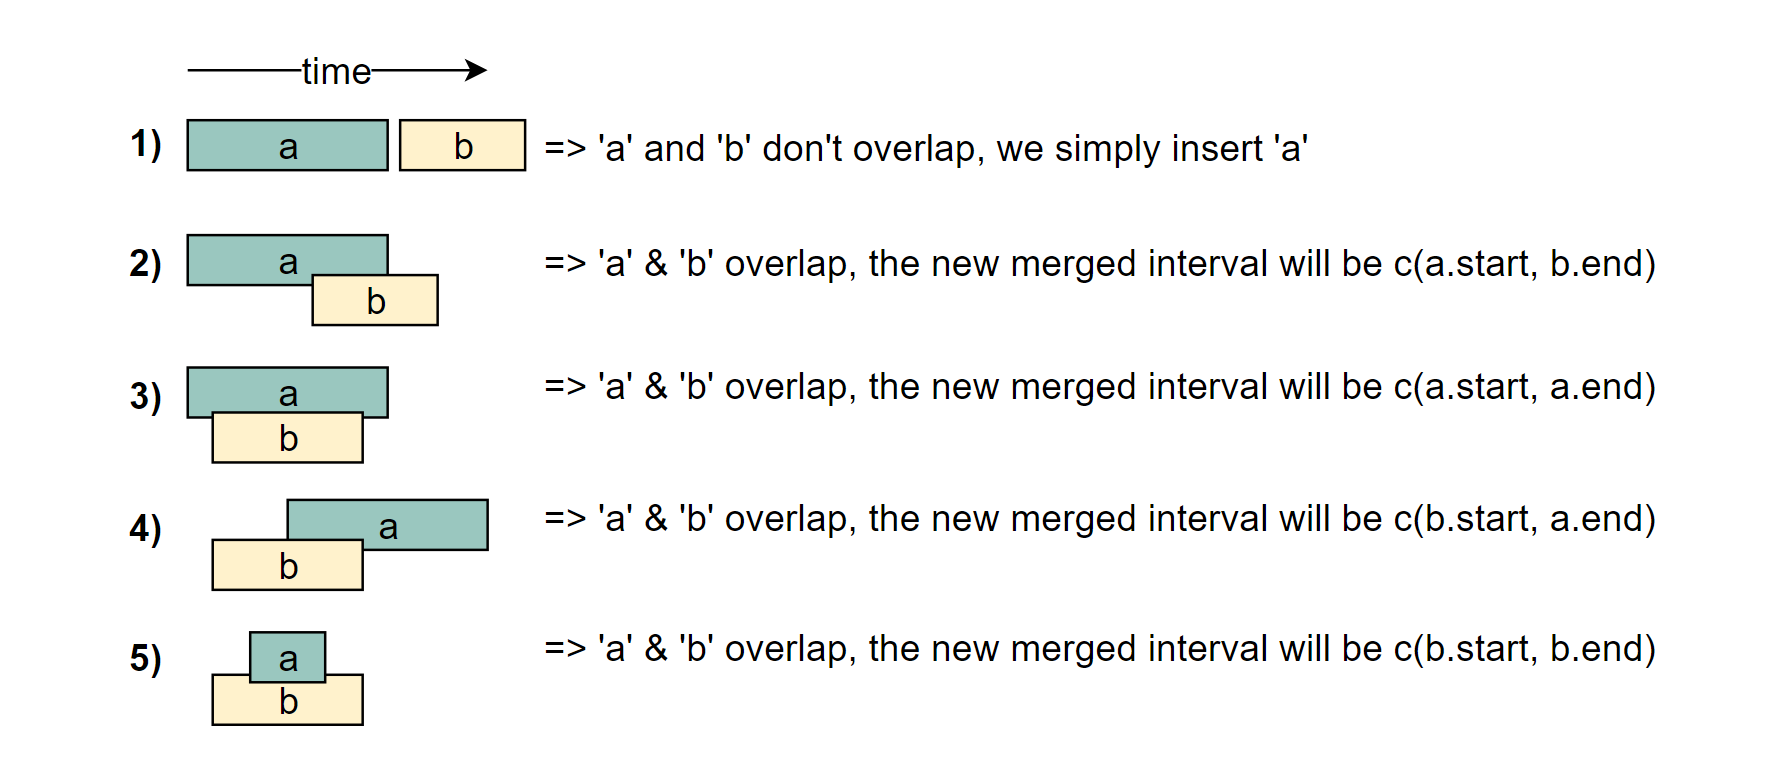

1. Skip all intervals which end before the start of the new interval, i.e., skip all intervals with the following condition:
    ```intervals[i].end < newInterval.start```
2. Let’s call the last interval ‘b’ that does not satisfy the above condition. If ‘b’ overlaps with the new interval (a) (i.e. b.start <= a.end), we need to merge them into a new interval ‘c’:
    ```c.start = min(a.start, b.start)
    c.end = max(a.end, b.end)```
3. We will repeat the above two steps to merge ‘c’ with the next overlapping interval.

In [ ]:
class Solution:
    def insert(self, intervals: List[List[int]],
               newInterval: List[int]) -> List[List[int]]:
        if not intervals:
            return [newInterval]
        merged = []
        i, start, end = 0, 0, 1

        # skip (and add to output) all intervals that come before the 'new_interval'
        while i < len(intervals) and intervals[i][end] < newInterval[start]:
            merged.append(intervals[i])
            i += 1

        # merge all intervals that overlap with 'new_interval'
        while i < len(intervals) and intervals[i][start] <= newInterval[end]:
            newInterval[start] = min(intervals[i][start], newInterval[start])
            newInterval[end] = max(intervals[i][end], newInterval[end])
            i += 1

        # insert the new_interval
        merged.append(newInterval)

        # add all the remaining intervals to the output
        while i < len(intervals):
            merged.append(intervals[i])
            i += 1
        return merged

## Cyclic sort

Cyclic sort can be used on arrays which have elements 1<=a[i]<n 

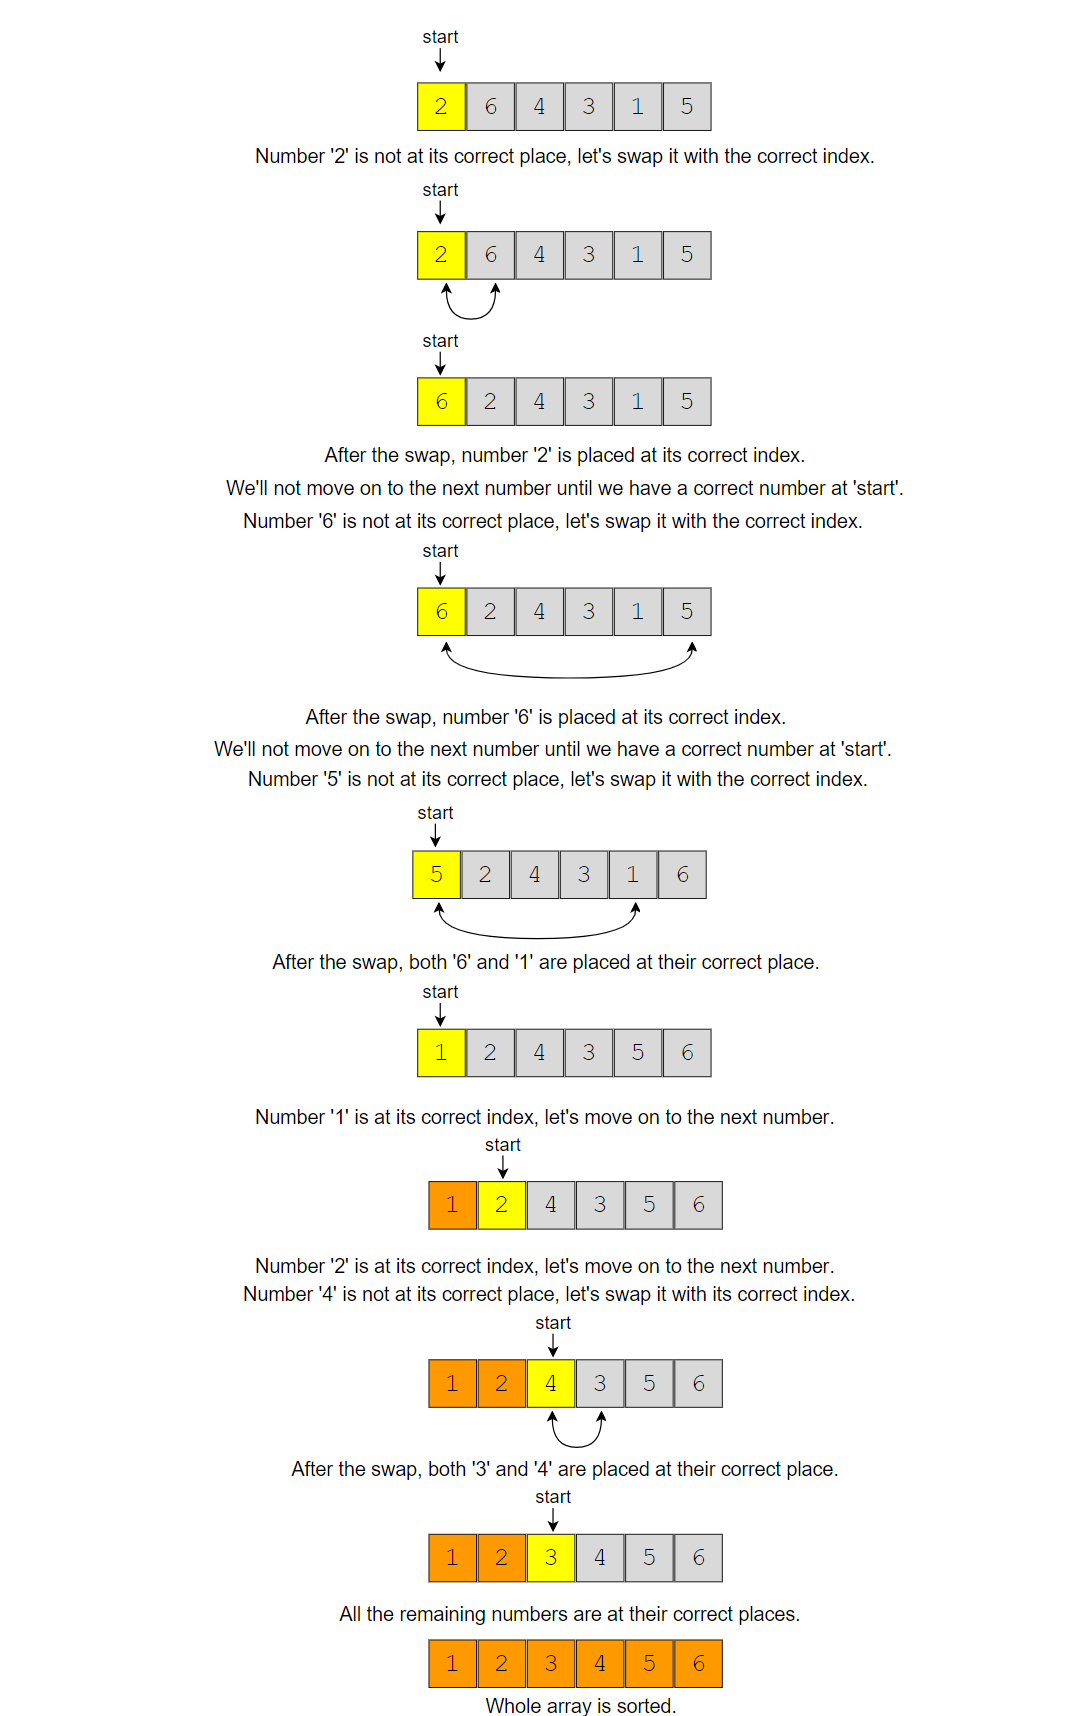

### [Find all duplicates](https://leetcode.com/problems/find-all-duplicates-in-an-array/)

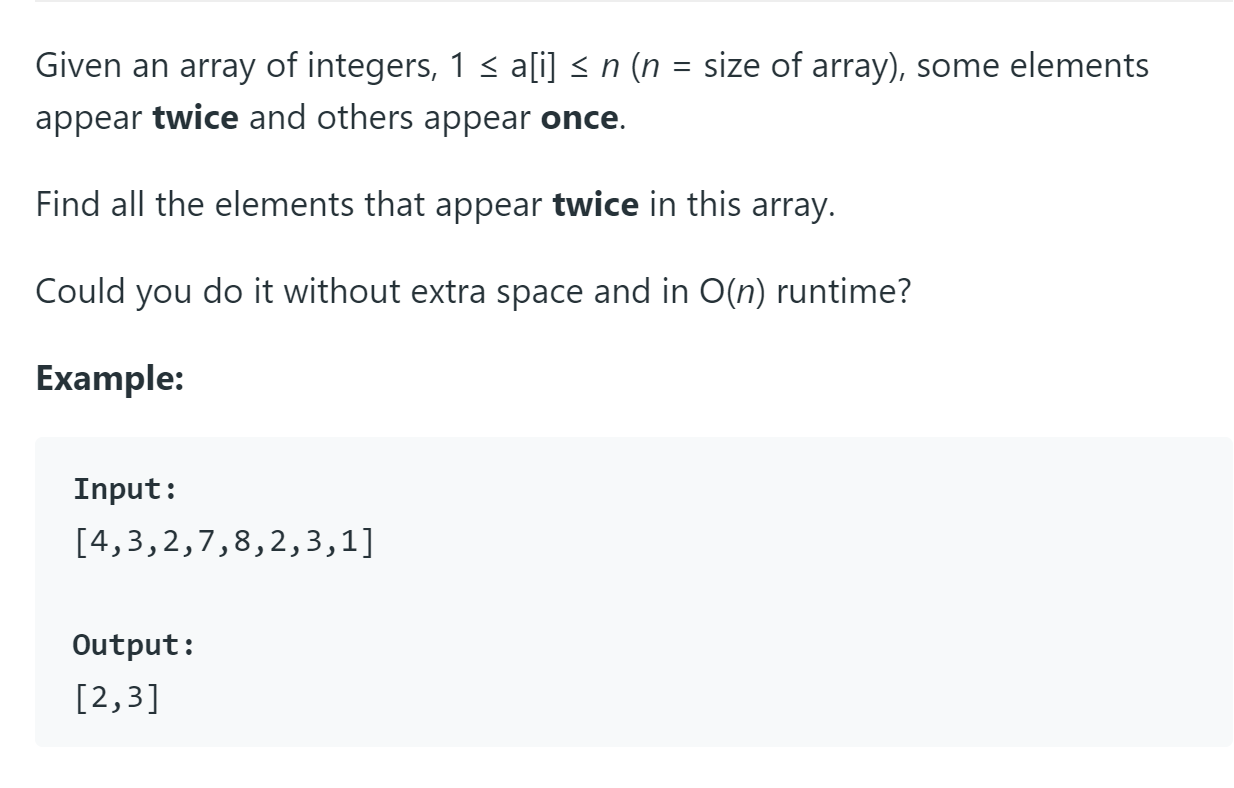

In [ ]:
'''
Approach: Cyclic sort
TC: O(N) 2 loops
SC: O(N)

'''
class Solution:
    def findDuplicates(self, nums: List[int]) -> List[int]:
        i = 0
        while i < len(nums):
            j = nums[i] - 1
            if nums[i] != nums[j]:
                nums[i], nums[j] = nums[j], nums[i]  # swap
            else:
                i += 1

        
        duplicateNumbers = []
        for i in range(len(nums)):
            if nums[i] != i + 1: # number is not equal to index 
                duplicateNumbers.append(nums[i])

        return duplicateNumbers[::-1] #reverse O(N)

In [ ]:
'''
Approach: Go over each num in the array and multiply -1 to the number at the index (num - 1)
and check if the number at that index is positive. If positive then that occured twice
TC: O(N) one pass 
SC: O(N) for result. 
'''

class Solution:
    def findDuplicates(self, nums: List[int]) -> List[int]:
        duplicate_nums = []
        for i in range(len(nums)):
            j = abs(nums[i]) - 1
            
            # multiply with -1. Duplicate nums have + val at the index.
            nums[j] *= -1 
            
            if nums[j] > 0:
                duplicate_nums.append(abs(nums[i]))
        return duplicate_nums

### [Missing number](https://leetcode.com/problems/missing-number/)

In [ ]:
class Solution:
    def missingNumber(self, nums: List[int]) -> int:
        i, n = 0, len(nums)
        while i < n:
            j = nums[i]
            if nums[i] < n and nums[i] != nums[j]:
                nums[i], nums[j] = nums[j], nums[i]  # swap
            else:
                i += 1
                
        print(nums)
        
        for i in range(1,len(nums)):
            if nums[i] != i:
                return i
            
        return 0

### [Find All Numbers Disappeared in an Array](https://leetcode.com/problems/find-all-numbers-disappeared-in-an-array/)

In [ ]:
class Solution:
    def findDisappearedNumbers(self, nums: List[int]) -> List[int]:
        i, n = 0, len(nums)
        while i < n:
            j = nums[i]-1
            if  nums[i] != nums[j]:
                nums[i], nums[j] = nums[j], nums[i]  # swap
            else:
                i += 1
                
        missing_nums = []
        
        for i in range(len(nums)):
            if nums[i] != i+1:
                missing_nums.append(i+1)
            
        return missing_nums

### [First missing positive](https://leetcode.com/problems/first-missing-positive/)

In [ ]:
'''
Approach: Cyclic sort

Time complexity: O(N)
Space complexity: O(1)
'''
class Solution:
    def firstMissingPositive(self, nums: List[int]) -> int:
        if len(nums) == 0:
            return 1

        i = 0
        n = len(nums)
        # cyclic sort.
        while i< n:
            j = nums[i]-1
            # cyclic sort applies to 1<= x <= n so check the number is in that range 
            if nums[i] > 0 and nums[i] <= n and nums[i] != nums[j]:
                #swap
                nums[i], nums[j] = nums[j], nums[i]
            else:
                i += 1

        # check if val equals index + 1
        for i in range(len(nums)):
            if nums[i] != i+1:
                return i+1
        # if the array contains all positive integers then return the next positive integer
        return len(nums) + 1


## Matrix problems

### [Set Matrix Zeroes](https://leetcode.com/problems/set-matrix-zeroes/)

In [ ]:
class Solution:
    def setZeroes(self, matrix: List[List[int]]) -> None:
        """
        Do not return anything, modify matrix in-place instead.
        """
        if not matrix:
            return
        res = []
        # To store row,col value where there is a  0 in the matrix
        for i in range(len(matrix)):
            for j in range(len(matrix[0])):
                if matrix[i][j] == 0:
                    res.append([i, j])
        
        row = len(matrix)
        col = len(matrix[0])
        
        # Change the row and col values to 0 
        for i, j in res:
            n, m = 0, 0
            while n < row:
                matrix[n][j] = 0
                n += 1
            while m < col:
                matrix[i][m] = 0
                m += 1

### [Spiral matrix](https://leetcode.com/problems/spiral-matrix)

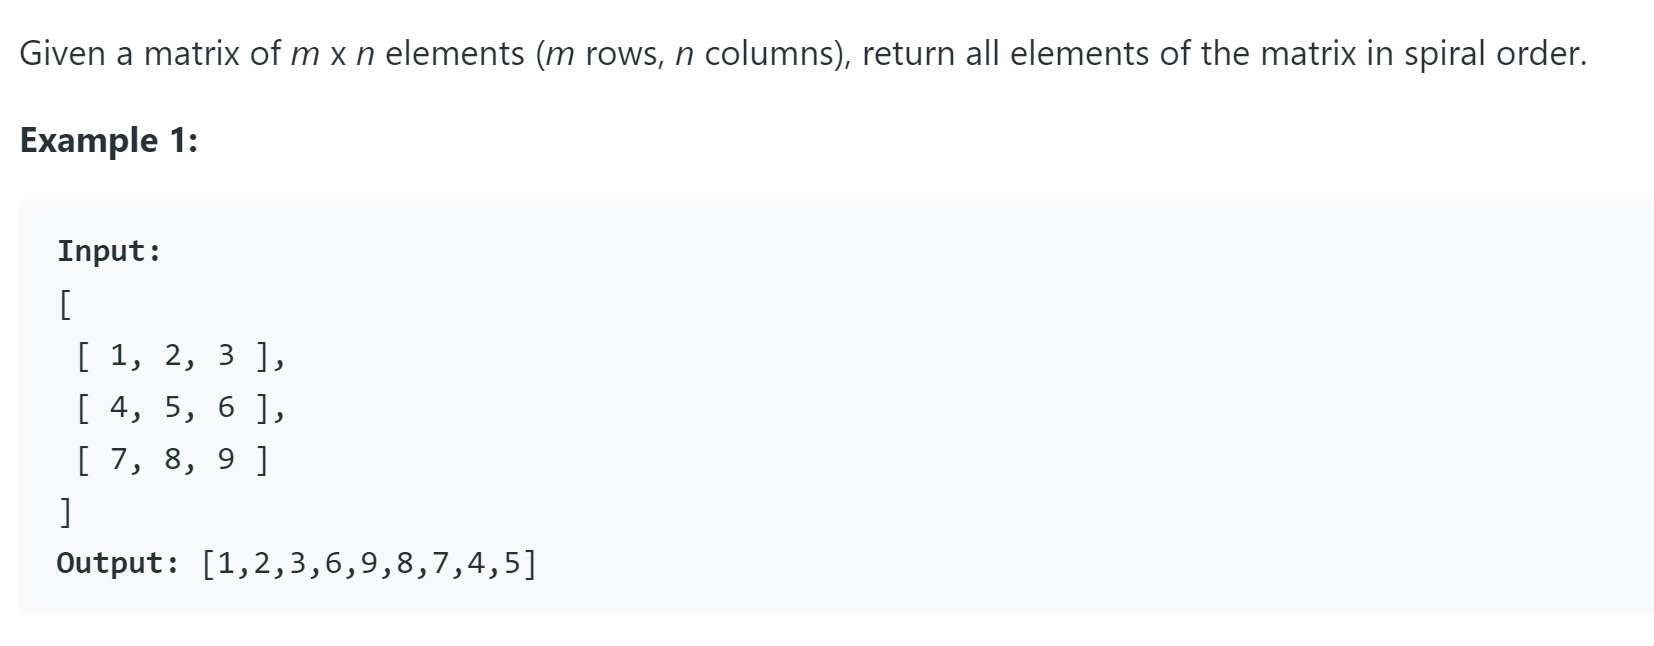

**Algorithm:** [Video](https://www.youtube.com/watch?v=siKFOI8PNKM)
1. Initialize top, bottom, left and right indexes of the matrix
2. Move from left to right, top row has been traversed so top ++
3. Move from top to bottom (right most column), right column has been traversed so right --
4. Move from right to left ( bottom row), bottom row column has been traversed so bottom --
5. Move from bottom to top (left column), left column has been traversed so left ++
6. Repeat 2 - 5 until top > bottom and left > right

In [ ]:
class Solution:
    def spiralOrder(self, matrix: List[List[int]]) -> List[int]:
        if len(matrix)==0:
            return
        row = len(matrix)-1
        col = len(matrix[0])-1
        direction = 0
        L,T,B,R = 0, 0, row, col
        res = []


        while T <= B and L <= R:
            # move left
            if direction == 0:
                for i in range(L,R+1):
                    res.append(matrix[T][i])
                # as the top row is traversed
                T += 1
            # move down
            elif direction == 1:
                for j in range(T,B+1):
                    res.append(matrix[j][R])
                # as the right row is traversed
                R -= 1
            # move left
            elif direction == 2:
                for i in range(R, L-1,-1):
                    res.append(matrix[B][i])
                B -= 1
            # move up
            elif direction == 3:
                for i in range(B,T-1,-1):
                    res.append(matrix[i][L])
                L += 1
            direction = (direction + 1) % 4
        return res


### [Generate Spiral matrix](https://leetcode.com/problems/spiral-matrix-ii)

In [ ]:
class Solution:
    def generateMatrix(self, n: int) -> List[List[int]]:
        
        matrix = [[0 for _ in range(n)] for _ in range(n)] #O(N^2) space
        direction = 0
        top, bottom, left, right = 0, len(matrix) - 1, 0, len(matrix[0]) - 1
        count = 0
        while top <= bottom or right >= left:        
                if direction == 0:
                    for i in range(left, right+1):
                        matrix[top][i] = count + 1
                        count += 1
                    top += 1
                elif direction == 1:
                    for i in range(top, bottom + 1):
                        matrix[i][right] = count + 1
                        count += 1
                    right -= 1
                elif direction == 2:
                    for i in range(right, left-1, -1):
                        matrix[bottom][i] = count + 1
                        count += 1
                    bottom -= 1
                elif direction == 3:
                    for i in range(bottom, top-1, -1):
                        matrix[i][left] = count + 1
                        count += 1
                    left += 1
                direction = (direction + 1) % 4
        return matrix

### [Search in a matrix 1](https://leetcode.com/problems/search-a-2d-matrix)

In [ ]:
'''
Approach: Start from matrix[row][0] and move up if matrix[i][j] > target and move right if matrix[i][j] < target
TC: O(N+M) 
SC:O(1)
'''
class Solution:
    def searchMatrix(self, matrix, target):
        """
        :type matrix: List[List[int]]
        :type target: int
        :rtype: bool
        """
        row = len(matrix)-1
        col = 0
        
        # O(N+M)
        while row >= 0 and col < len(matrix[0]):
            if matrix[row][col] > target: # move up
                row -= 1
            elif matrix[row][col] < target: # move right
                col += 1
            else:
                return True
        return False

### [Search in a matrix 2](https://leetcode.com/problems/search-a-2d-matrix-ii/)

In [ ]:
class Solution:
    def searchMatrix(self, matrix, target):
        """
        :type matrix: List[List[int]]
        :type target: int
        :rtype: bool
        """
        row = len(matrix)-1
        col = 0
        
        while row >= 0 and col < len(matrix[0]):
            if matrix[row][col] > target:
                row -= 1
            elif matrix[row][col] < target:
                col += 1
            else:
                return True
        return False
                
        

### [Diagonal traverse](https://leetcode.com/problems/diagonal-traverse)

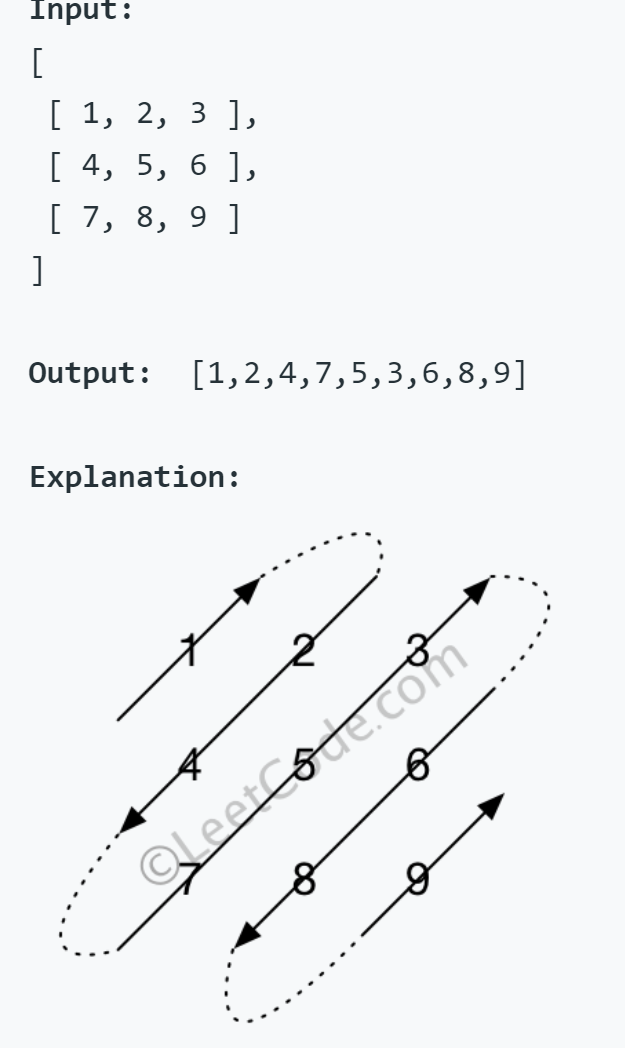

In [ ]:
'''
Idea: Create a list of deques with every deque for every diagonal
When the diagonal is at odd position the values are in the reverse order(starting from bottom) so do appendleft 
when the diagonal is at even position the values are in normal order so append. 

'''
class Solution:
    def findDiagonalOrder(self, matrix: List[List[int]]) -> List[int]:
        if not matrix:
            return
        row = len(matrix)
        col = len(matrix[0])
        res = [collections.deque() for i in range(row+col-1)]
        
        # O(MN)
        for i in range(row):
            for j in range(col):
                if (i+j)%2 == 0:
                    res[i+j].appendleft(matrix[i][j])
                else:
                    res[i+j].append(matrix[i][j])
        # O(M+N)
        flat_list = [item for sublist in res for item in sublist]
        return flat_list
                
        

### [Game of Life](https://leetcode.com/problems/game-of-life/)

In [ ]:

''' 
APPROACH 1 :
 copy the board, make changes in the copy, copy the result to original

APPRAOCH 2 :
 when the value needs to be updated, we donot just change  0 to 1 / 1 to 0 but we do in increments and decrements of 2. (table explains)

#   previous value state change  current state   current value
#   0              no change     dead            0
#   1              no change     live            1
#   0              changed (+2)  live            2
#   1              changed (-2)  dead            -1'''


class Solution:
    def gameOfLife(self, board: List[List[int]]) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
        if len(board) == 0:
            return
        
        for i in range(len(board)):
            for j in range(len(board[0])):
                live_count = 0
                zero_count = 0
                # 8 directions
                directions = [(1,0), (1,-1), (0,-1), (-1,-1), (-1,0), (-1,1), (0,1), (1,1)]
                for x, y in directions:
                    if 0 <= i+x < len(board) and 0 <= j+y < len(board[0]):
                        if board[i+x][j+y] == 1:
                            live_count += 1
                if board[i][j] == 0 and live_count == 3:
                    board[i][j] = 2
                elif board[i][j] == 1 and (live_count < 2 or live_count > 3):
                    board[i][j] = -1
                
        for i in range(len(board)):
            for j in range(len(board[0])):
                if board[i][j] > 0:
                    board[i][j] = 1
                else:
                    board[i][j] = 0
        

### [Rotate image](https://leetcode.com/problems/rotate-image/)

In [ ]:
class Solution:
    def rotate(self, matrix: List[List[int]]) -> None:
        """
        Do not return anything, modify matrix in-place instead.
        """
        # 1. Swap 1st row with nth row, 2nd row with n-1th row and so on.
        start = 0
        end = len(matrix) - 1

        while start < end:
            matrix[start], matrix[end] = matrix[end], matrix[start]
            start += 1
            end -= 1

        # 2. Swap values on either sides of the diagonal
        for i in range(len(matrix)):
            # j < i
            for j in range(i):
                matrix[i][j], matrix[j][i] = matrix[j][i], matrix[i][j]

#### Rotate image 180

## Array rotation problems

#### Right rotate array

In [ ]:
class Solution:
    def rotate(self, nums: List[int], k: int) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        
        def reverse(arr, start, end):
            while start < end:
                arr[start], arr[end] = arr[end], arr[start]
                start += 1
                end -= 1
        
        n = len(nums)
        k = k % n 
        
        reverse(nums,0, n-1)
        reverse(nums, 0,k-1)
        reverse(nums, k, n-1)
        

## Arrangement and rearrangement problems

## Order statistics

## Sorting variants problems